\newpage

In [93]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


### **1. Classification Problem Identification**

Dataset is used from the [Early Stage of Indians Chronic Kidney Disease (CKD)](https://archive.ics.uci.edu/dataset/336/chronic+kidney+disease) project, which comprises data on 250 early-stage CKD patients and 150 healthy controls.

In this assignment, machine learning (ML) techniques have been deployed to predict, diagnose, and treat chronic kidney disease (CKD). 

In [94]:
## Load Dataset
data_url = 'https://archive.ics.uci.edu/static/public/336/data.csv'
df = pd.read_csv(data_url)
df.head(2)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.02,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.02,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd


In [95]:
# fetch dataset 
chronic_kidney_disease = fetch_ucirepo(id=336) 
# metadata 
print(chronic_kidney_disease.metadata) 

{'uci_id': 336, 'name': 'Chronic Kidney Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/336/chronic+kidney+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/336/data.csv', 'abstract': 'This dataset can be used to predict the chronic kidney disease and it can be collected from the hospital nearly 2 months of period.', 'area': 'Other', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 400, 'num_features': 24, 'feature_types': ['Real'], 'demographics': ['Age'], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2015, 'last_updated': 'Mon Mar 04 2024', 'dataset_doi': '10.24432/C5G020', 'creators': ['L. Rubini', 'P. Soundarapandian', 'P. Eswaran'], 'intro_paper': None, 'additional_info': {'summary': 'We use the following representation to collect the dataset\r\n                        age\t\t-\tage\t\r\n\t\t\tbp\t\t-\tblood pressure\r\n\t\t\tsg\t

In [96]:
# data (as pandas dataframes) 
X = chronic_kidney_disease.data.features 
y = chronic_kidney_disease.data.targets 

In [97]:
# Features
X.head(2)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane
0,48.0,80.0,1.02,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,15.4,44.0,7800.0,5.2,yes,yes,no,good,no,no
1,7.0,50.0,1.02,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,11.3,38.0,6000.0,NaN,no,no,no,good,no,no


In [98]:
# Target
y.head(2)

,class
0,ckd
1,ckd


The classification problem is determining whether a patient has early-stage CKD based on various medical measurements included in the dataset. There are two classes here: Early-stage Indian CKD patients and Healthy patients.

### **2. Variable Transformation**

In [99]:
df.dtypes

age      float64
bp       float64
sg       float64
al       float64
su       float64
rbc       object
pc        object
pcc       object
ba        object
bgr      float64
bu       float64
sc       float64
sod      float64
pot      float64
hemo     float64
pcv      float64
wbcc     float64
rbcc     float64
htn       object
dm        object
cad       object
appet     object
pe        object
ane       object
class     object
dtype: object

From the dictionary， `sg`, `al`, `su` are Categorical variables. `age`, `bp`, `bgr`, `bu`, `sod`, `pcv`, `wbcc` are Integer variable. `rbc`, `pc`, `pcc`, `ba`, `htn`, `dm`, `cad`, `appet`, `pe`, `ane`, `class` are Binary variables. `sc`,`pot`,`hemo`,and `rbcc` are continuous varibles. Then, we need to transform `sg`, `al`, `su` into Categorical variables and convert those binary variables to numerical (0 and 1). Since there are missing values in those cat variables, we will convert them after replacing those missing values

In [100]:
# Binary trans
columns_bin = ['rbc','pc','pcc','ba','htn','dm','cad','appet','pe','ane','class']
mapping = {'normal': 1, 'present': 1, 'abnormal': 0, 'notpresent': 0, 'yes':1,'no':0,'good':1,'poor':0,'ckd':1,'notckd':0}

for column in columns_bin:
    df[column] = df[column].map(mapping).astype(float)
    
df.head(3)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.02,1.0,0.0,NaN,1.0,0.0,0.0,121.0,...,44.0,7800.0,5.2,1.0,1.0,0.0,1.0,0.0,0.0,1.0
1,7.0,50.0,1.02,4.0,0.0,NaN,1.0,0.0,0.0,NaN,...,38.0,6000.0,NaN,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,62.0,80.0,1.01,2.0,3.0,1.0,1.0,0.0,0.0,423.0,...,31.0,7500.0,NaN,0.0,1.0,0.0,0.0,0.0,1.0,1.0


### **3. Dataset Overview**

In [101]:
# Summary
df.describe()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
count,391.000000,388.000000,353.000000,354.000000,351.000000,248.000000,335.000000,396.000000,396.000000,356.000000,...,329.000000,294.000000,269.000000,398.000000,397.000000,398.000000,399.000000,399.000000,399.000000,398.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,0.810484,0.773134,0.106061,0.055556,148.036517,...,38.884498,8406.122449,4.707435,0.369347,0.345088,0.085427,0.794486,0.190476,0.150376,0.623116
std,17.169714,13.683637,0.005717,1.352679,1.099191,0.392711,0.419431,0.308305,0.229351,79.281714,...,8.990105,2944.474190,1.025323,0.483235,0.475997,0.279868,0.404584,0.393170,0.357888,0.485216
min,2.000000,50.000000,1.005000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,...,9.000000,2200.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,99.000000,...,32.000000,6500.000000,3.900000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,121.000000,...,40.000000,8000.000000,4.800000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,1.000000,1.000000,0.000000,0.000000,163.000000,...,45.000000,9800.000000,5.400000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,490.000000,...,54.000000,26400.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [102]:
# Observations count
print(df.shape)
# type check
df.dtypes

(400, 25)


age      float64
bp       float64
sg       float64
al       float64
su       float64
rbc      float64
pc       float64
pcc      float64
ba       float64
bgr      float64
bu       float64
sc       float64
sod      float64
pot      float64
hemo     float64
pcv      float64
wbcc     float64
rbcc     float64
htn      float64
dm       float64
cad      float64
appet    float64
pe       float64
ane      float64
class    float64
dtype: object

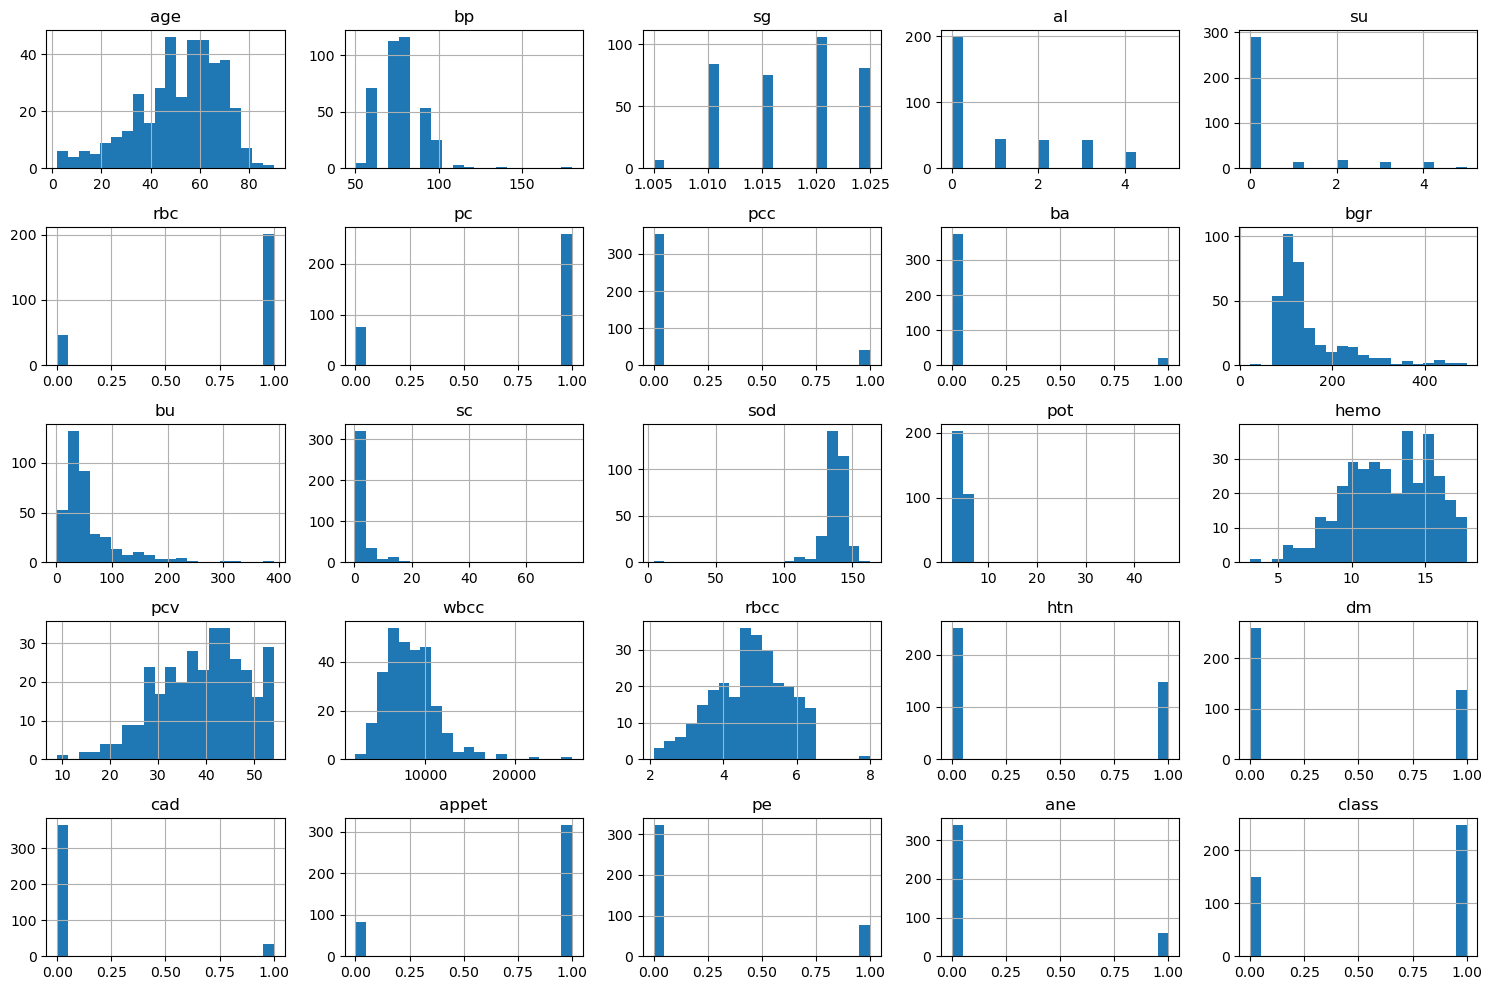

In [103]:
# Distribution
df.hist(bins=20, figsize=(15,10))
plt.tight_layout()
plt.show()

There are 400 observations and 25 variables in the dataset. `sg`, `al`, `su` are Categorical variables now. `age`, `bp`, `bgr`, `bu`, `sod`, `pcv`, `wbcc`,`sc`,`pot`,`hemo`,and `rbcc` variables are all of type float. The rest of the variables are object(in this case Binary).

According to the data summary, the mean of observations under the `age` variable was about 51.48. The maximum and minimum age are 90 and 2 respectively, respectively. Also, the mean of `bp` (blood pressure) is about 76.47. But there may be some missing values and outliers in the dataset based on the data summary.

Also, we can find that most of them have the skewness problem by looking at the distribution of observations under each variable. So, this implies that there exist a lot of missing values and outliers in our dataset. And, depending on the distribution, we might consider replacing the missing values with a median.

### **4. Association Between Variables**

Create a heatmap to find potential relationship between variables.

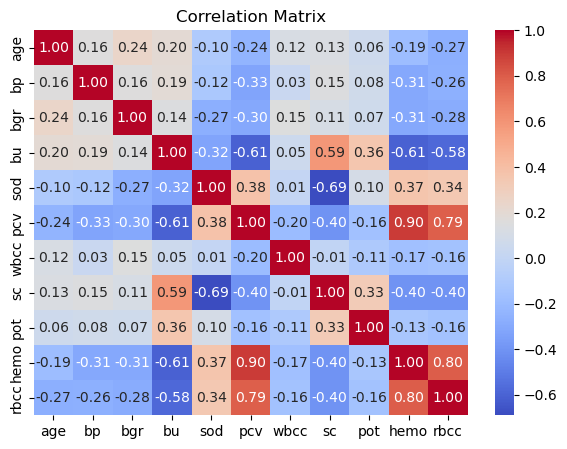

In [104]:
num_col = ['age','bp','bgr','bu','sod','pcv','wbcc','sc','pot','hemo','rbcc']

# Compute the correlation matrix
correlation_matrix = df[num_col].corr()

# Plot the correlation matrix
plt.figure(figsize=(7, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Variables `sc` (serum creatinine) and `hemo` (hemoglobin) have a strong negative correlation (-0.61), suggesting that as serum creatinine levels increase, hemoglobin levels tend to decrease.

`pcv` (packed cell volume) and `hemo` (hemoglobin) show a strong positive correlation (0.90). This indicates that when the Packed cell volume rises, the amount of Hemoglbin will also increase. This may be because both are related to the blood's ability to carry oxygen.

`sod` (sodium) appears to have a moderate negative correlation with `bu` (blood urea) and `sc` (serum creatinine), which might suggest that higher levels of urea and creatinine in the blood are associated with lower sodium levels.

In [105]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF

df_cleaned = df[num_col].dropna()
vals = [VIF(df_cleaned, i)
        for i in range(1, df_cleaned.shape[1])]
vif = pd.DataFrame({'vif':vals}, index=df_cleaned.columns[1:])
vif

,vif
bp,33.314145
bgr,5.228453
bu,10.308152
sod,154.643905
pcv,106.157383
wbcc,10.830481
sc,7.157653
pot,3.696926
hemo,110.751640
rbcc,63.753595


From variance inflation factor, `sod`, `pcv` and `hemo` have extremely large value, this indicates that they have severe multicollinearity issues. To solve this problem, Ridge Regression/ PCA or LASSO will be applied in the next part. 

### **5. Missing Value Analysis and Handling**

In [106]:
## Check the missing vlaue
df.isna().sum()

age        9
bp        12
sg        47
al        46
su        49
rbc      152
pc        65
pcc        4
ba         4
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      52
pcv       71
wbcc     106
rbcc     131
htn        2
dm         3
cad        2
appet      1
pe         1
ane        1
class      2
dtype: int64

In [107]:
print(df.shape)

## Drop the missing values
df_dropna = df.dropna()
print(df_dropna.shape)


(400, 25)
(158, 25)


Based on the distribution of observed values for each variable in the dataset overview, we need to replace in those missing values in different ways. If the distribution is approximately normal, we choose to replace it with mean. If there is a skewness, we need to replace it in with median.

So, for `age`, `pcv`, `rbcc` variables. We choose to replace their missing values with mean. For the missing observations in the remaining variables, we replace them with median

In [108]:
#| warning: false

median_col = ['age', 'pcv', 'rbcc', 'bp', 'bgr', 'bu', 'sod', 'wbcc', 'sc', 'pot', 'hemo']
columns_bin = ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'class']
columns_cat = ['sg', 'al', 'su']

for column in median_col:
    df[column].fillna(df[column].median(), inplace=True)

for column in columns_bin + columns_cat:
    mode_value = df[column].mode()[0] 
    df[column].fillna(mode_value, inplace=True)

Now, we can convert those three numerical variables into categorical variables.

In [109]:
columns_cat = [ 'class','sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']
for col in columns_cat:
    df[col] = pd.Categorical(df[col])


df.dtypes

age       float64
bp        float64
sg       category
al       category
su       category
rbc      category
pc       category
pcc      category
ba       category
bgr       float64
bu        float64
sc        float64
sod       float64
pot       float64
hemo      float64
pcv       float64
wbcc      float64
rbcc      float64
htn      category
dm       category
cad      category
appet    category
pe       category
ane      category
class    category
dtype: object

In [110]:
df.head(10)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,1.0,1.0,0.0,0.0,121.0,...,44.0,7800.0,5.2,1.0,1.0,0.0,1.0,0.0,0.0,1.0
1,7.0,50.0,1.020,4.0,0.0,1.0,1.0,0.0,0.0,121.0,...,38.0,6000.0,4.8,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,62.0,80.0,1.010,2.0,3.0,1.0,1.0,0.0,0.0,423.0,...,31.0,7500.0,4.8,0.0,1.0,0.0,0.0,0.0,1.0,1.0
3,48.0,70.0,1.005,4.0,0.0,1.0,0.0,1.0,0.0,117.0,...,32.0,6700.0,3.9,1.0,0.0,0.0,0.0,1.0,1.0,1.0
4,51.0,80.0,1.010,2.0,0.0,1.0,1.0,0.0,0.0,106.0,...,35.0,7300.0,4.6,0.0,0.0,0.0,1.0,0.0,0.0,1.0
5,60.0,90.0,1.015,3.0,0.0,1.0,1.0,0.0,0.0,74.0,...,39.0,7800.0,4.4,1.0,1.0,0.0,1.0,1.0,0.0,1.0
6,68.0,70.0,1.010,0.0,0.0,1.0,1.0,0.0,0.0,100.0,...,36.0,8000.0,4.8,0.0,0.0,0.0,1.0,0.0,0.0,1.0
7,24.0,80.0,1.015,2.0,4.0,1.0,0.0,0.0,0.0,410.0,...,44.0,6900.0,5.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0
8,52.0,100.0,1.015,3.0,0.0,1.0,0.0,1.0,0.0,138.0,...,33.0,9600.0,4.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0
9,53.0,90.0,1.020,2.0,0.0,0.0,0.0,1.0,0.0,70.0,...,29.0,12100.0,3.7,1.0,1.0,0.0,0.0,0.0,1.0,1.0


In [111]:
# Check Missing Values again
df.isna().sum()

age      0
bp       0
sg       0
al       0
su       0
rbc      0
pc       0
pcc      0
ba       0
bgr      0
bu       0
sc       0
sod      0
pot      0
hemo     0
pcv      0
wbcc     0
rbcc     0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
class    0
dtype: int64

### **6. Outlier Analysis**

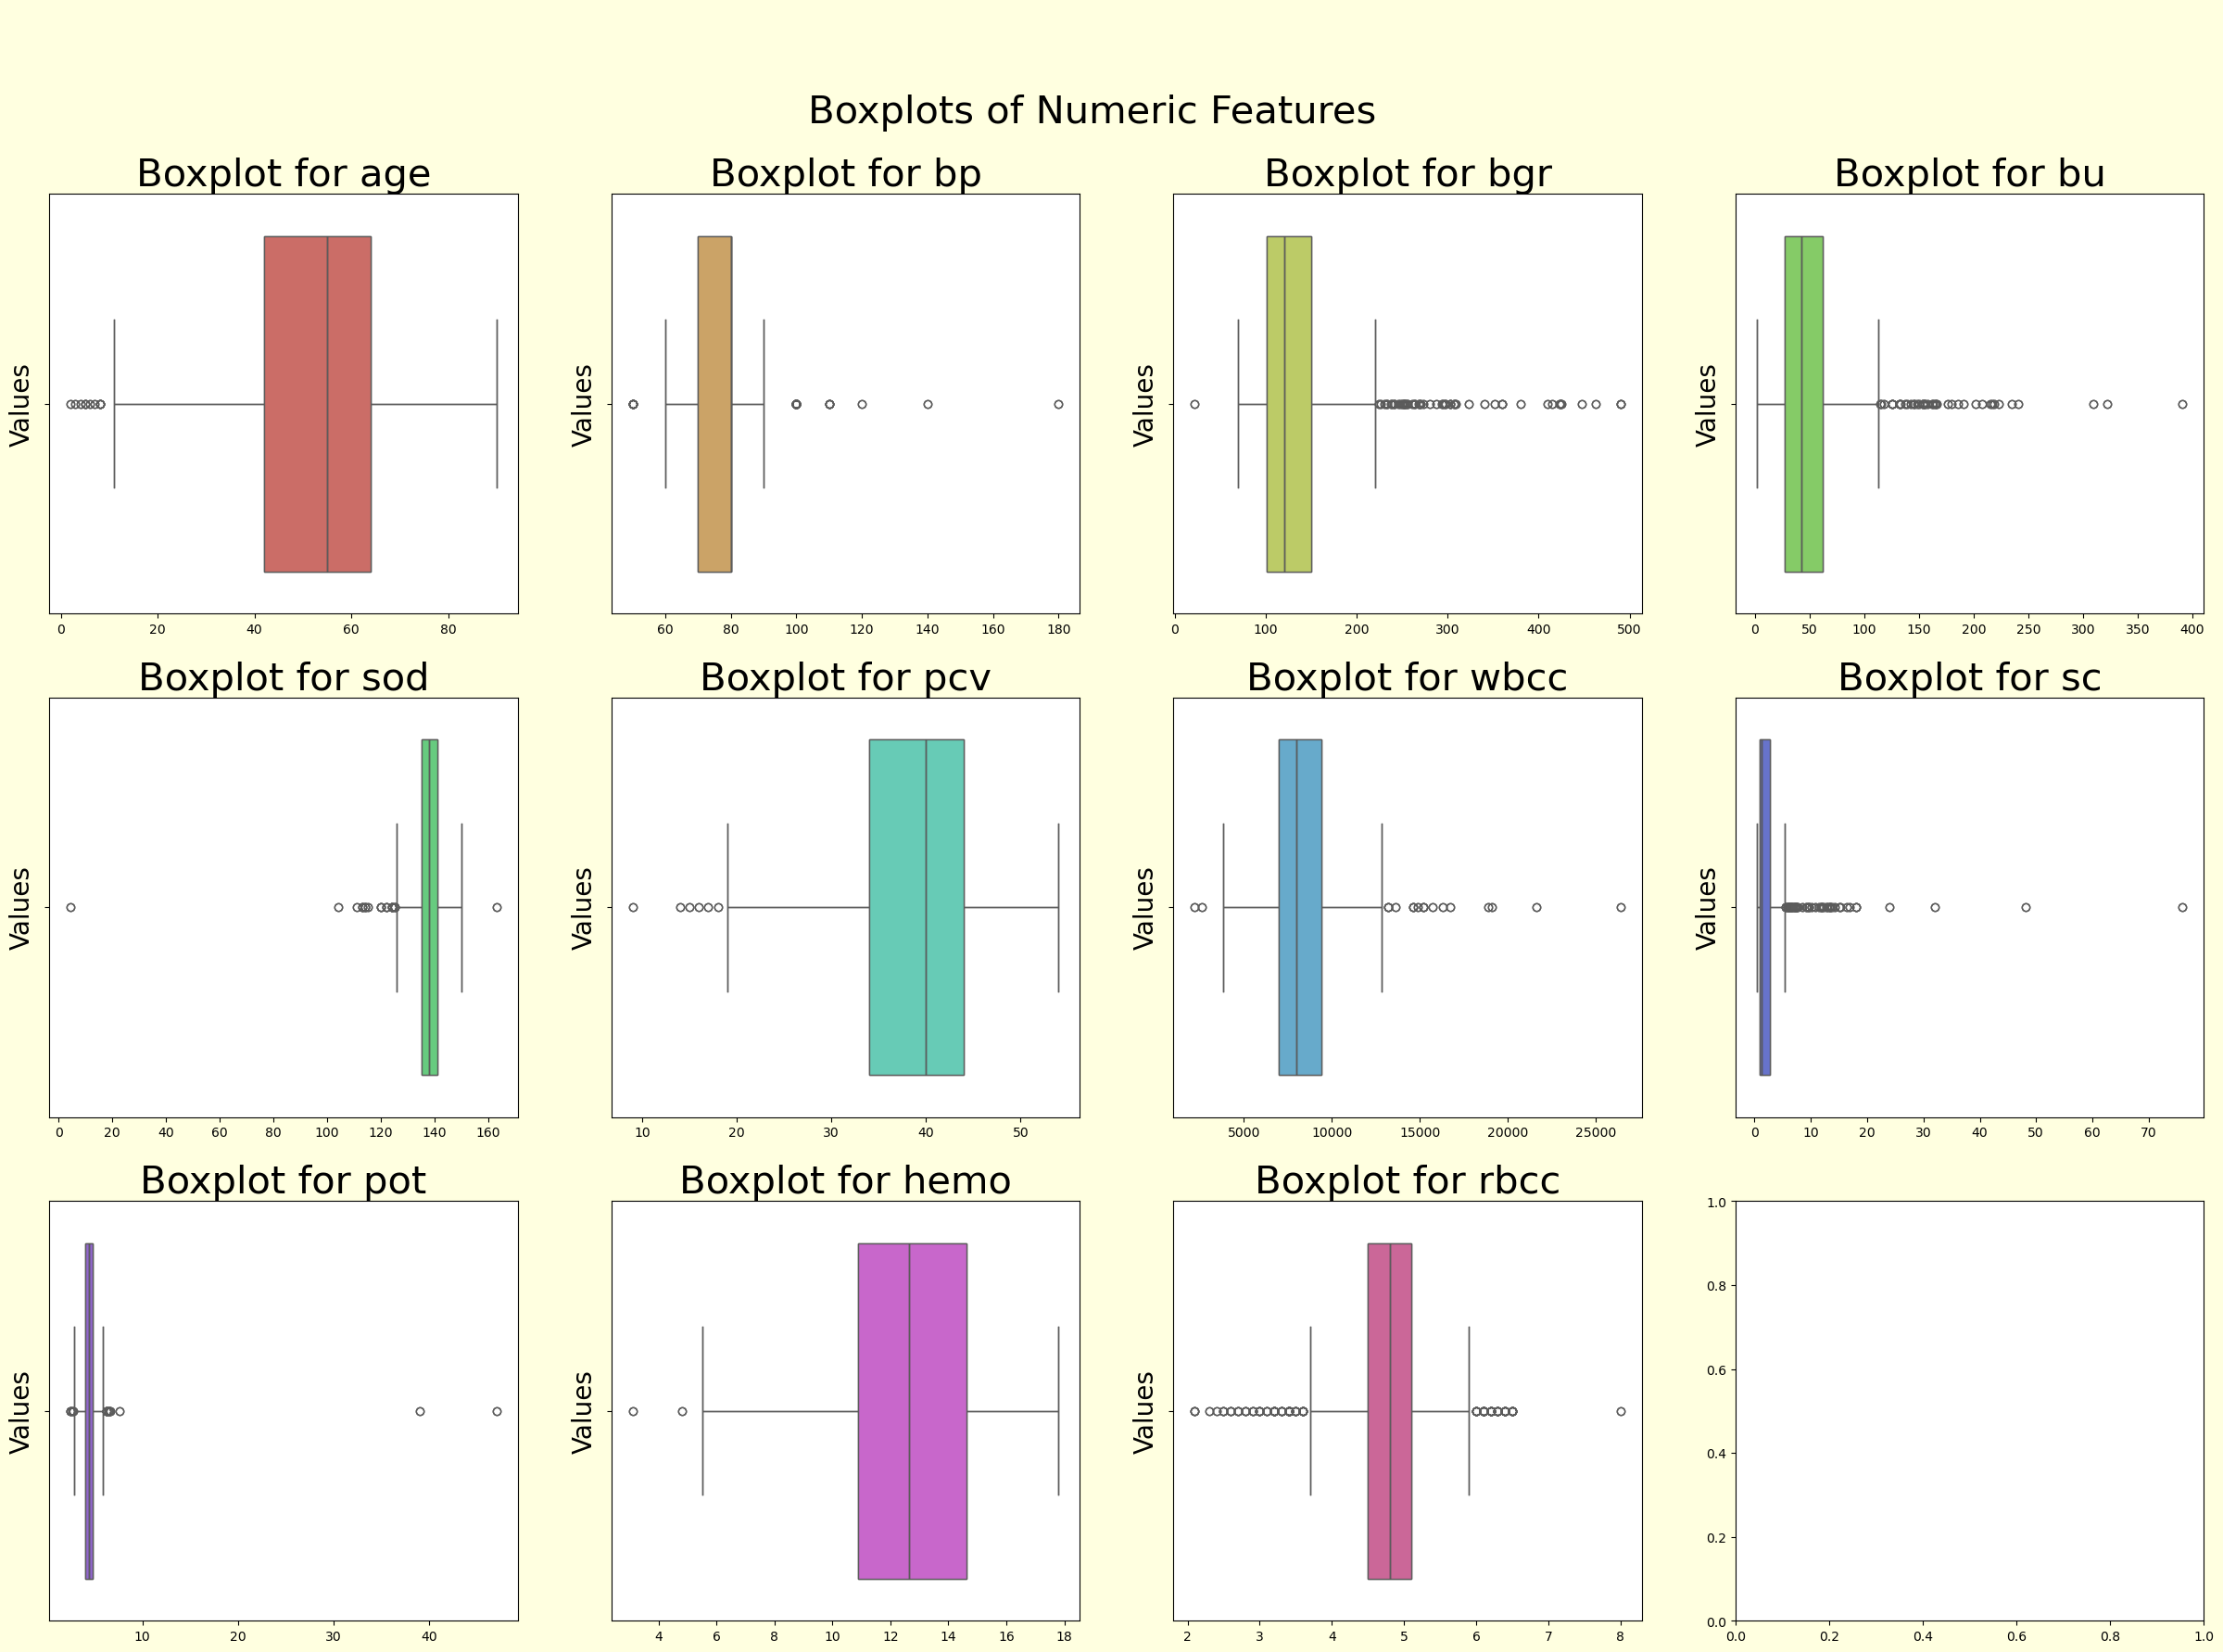

In [112]:
n_rows, n_cols = (3, 4)

colors = sns.color_palette("hls", len(df[num_col].columns))

figure, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(30, 20), facecolor='lightyellow')
figure.suptitle('\n\nBoxplots of Numeric Features', fontsize=30)

for index, column in enumerate(df[num_col].columns):
    
    i, j = index // n_cols, index % n_cols
    
    collabel = column
    
    sns.boxplot(x=df[column], ax=axes[i, j])

    sns.boxplot(x=df[column], ax=axes[i, j], color=colors[index])
    
    axes[i, j].set_title(f'Boxplot for {collabel}', fontsize=30)
    
    axes[i, j].set_xlabel(None)
    
    axes[i, j].set_ylabel("Values", fontsize=20)

plt.show()

In [113]:
from sklearn.preprocessing import scale

In [114]:
for column in df[num_col].columns:
    # Q3
    Q3 = df[column].quantile(0.75)
    Q1 = df[column].quantile(0.25)
    # Max val
    max_val = df[column].max()
    # .95
    np.quantile(df[column], 0.95)
    # outlier threshold
    threshold_max = Q3 + 1.5 * (Q3 - df[column].quantile(0.25))
    threshold_min = Q1 - 1.5 * (Q3 - df[column].quantile(0.25))
    # replace outlier with 95%
    df[column] = np.where(
        df[column] > threshold_max, 
        threshold_max, 
        df[column]
        )
    
    df[column] = np.where(
        df[column] < threshold_min, 
        threshold_min, 
        df[column]
        )


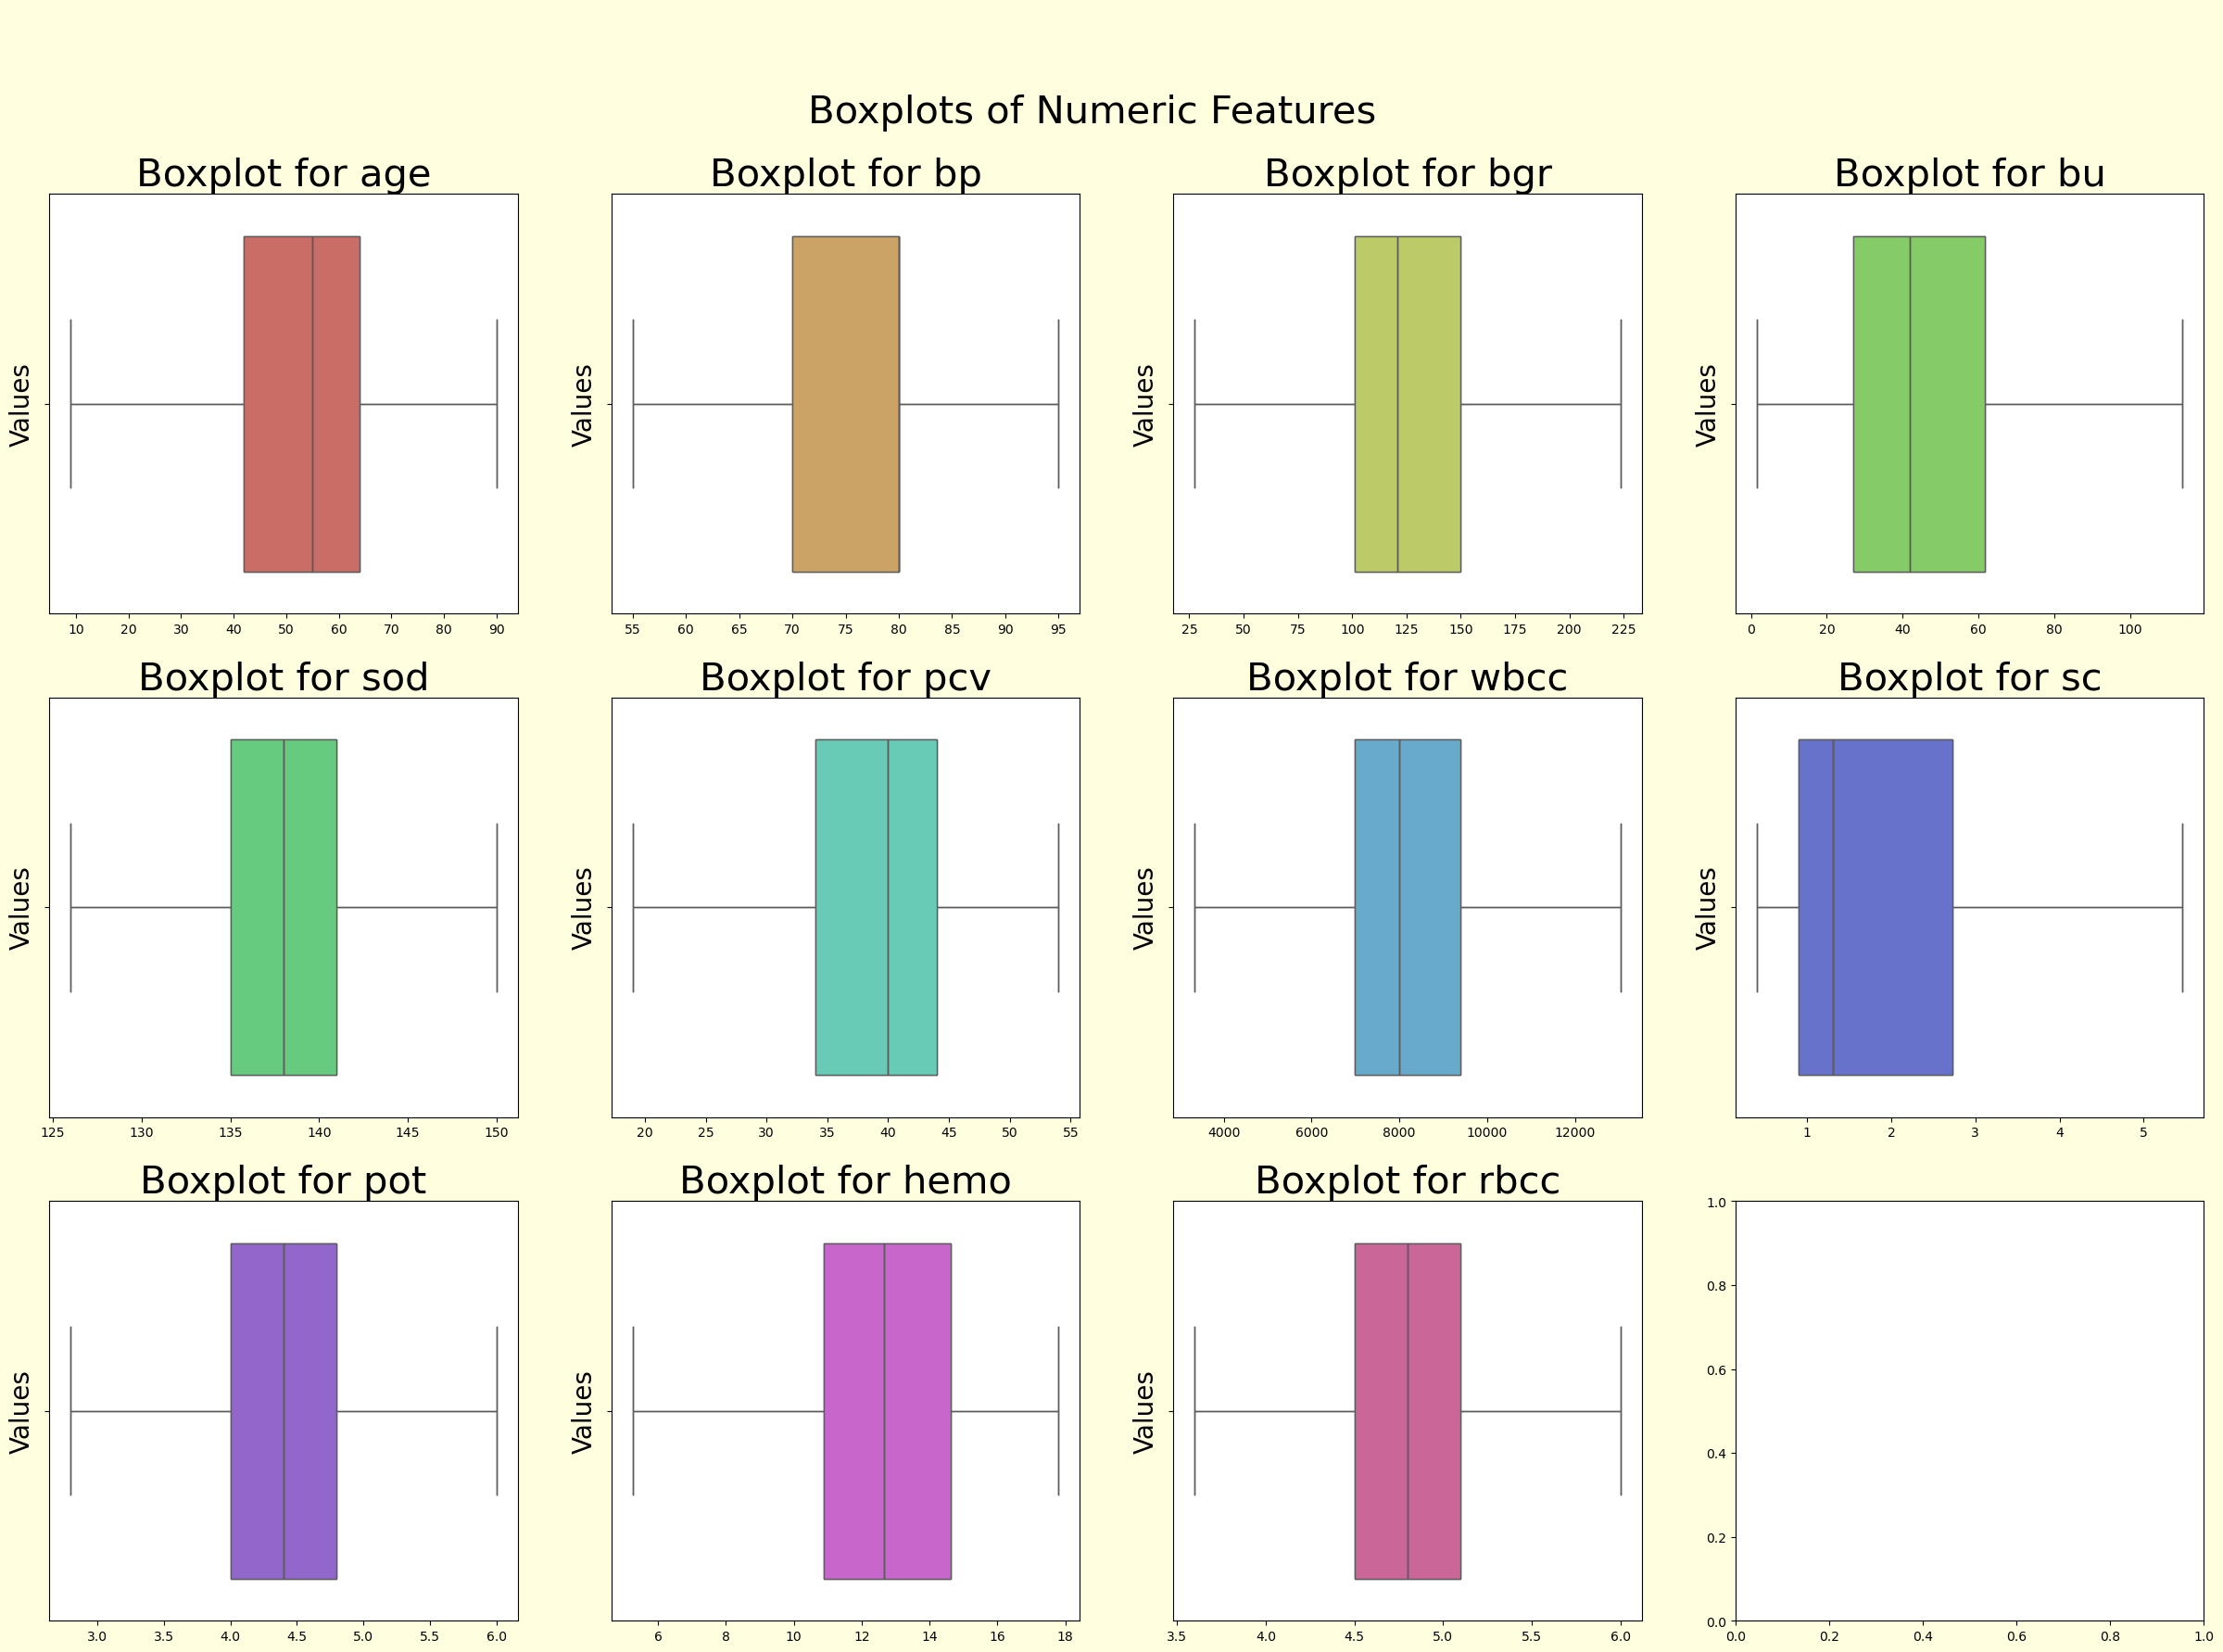

In [115]:
n_rows, n_cols = (3, 4)

colors = sns.color_palette("hls", len(df[num_col].columns))

figure, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(30, 20), facecolor='lightyellow')
figure.suptitle('\n\nBoxplots of Numeric Features', fontsize=30)

for index, column in enumerate(df[num_col].columns):
    
    i, j = index // n_cols, index % n_cols
    
    collabel = column
    
    sns.boxplot(x=df[column], ax=axes[i, j])

    sns.boxplot(x=df[column], ax=axes[i, j], color=colors[index])
    
    axes[i, j].set_title(f'Boxplot for {collabel}', fontsize=30)
    
    axes[i, j].set_xlabel(None)
    
    axes[i, j].set_ylabel("Values", fontsize=20)

plt.show()

We ended up replacing all the outliers in this step.

### **7. Sub-group Analysis**

In subgroup analysis, we need the unsupervised clustering technique K-Means to explore potential sub-groups.

In [116]:
# Check the mean
df[num_col].mean()

age       51.647500
bp        75.825000
bgr      134.011250
bu        50.277687
sod      138.217500
pcv       39.145000
wbcc    8169.093750
sc         2.071406
pot        4.382750
hemo      12.549000
rbcc       4.769750
dtype: float64

In [117]:
# Check the variance
df[num_col].var()

age     2.807652e+02
bp      1.203703e+02
bgr     2.124512e+03
bu      9.171178e+02
sod     2.780972e+01
pcv     6.371326e+01
wbcc    4.123827e+06
sc      2.659236e+00
pot     4.035864e-01
hemo    7.272142e+00
rbcc    4.553984e-01
dtype: float64

Variables with large variance have a greater impact on the algorithm in unsupervised learning. Therefore, we must scale all the variables before performing further algorithms.

In [118]:
# Scale the numerical data

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA, TruncatedSVD, FactorAnalysis

scaler = StandardScaler()
df[num_col] = scaler.fit_transform(
    df[num_col]
)
print(df[num_col])

          age        bp       bgr        bu       sod       pcv      wbcc  \
0   -0.217955  0.381013 -0.282640 -0.472051 -0.041296  0.609001 -0.181983   
1   -2.548388 -1.900504 -0.282640 -1.067169 -0.041296 -0.143626 -1.069478   
2    0.618610  0.381013  1.943938  0.090005 -0.041296 -1.021691 -0.329898   
3   -0.217955 -0.531594 -0.369530  0.189192 -2.319677 -0.896254 -0.724341   
4   -0.038691  0.381013 -0.608480 -0.802672 -0.041296 -0.519940 -0.428509   
..        ...       ...       ...       ...       ...       ...       ...   
395  0.200328  0.381013  0.130092 -0.042243  2.237086  0.985314 -0.724341   
396 -0.576483 -0.531594 -1.281884 -0.637362  0.528300  1.863379 -0.181983   
397 -2.369124  0.381013 -0.738816 -0.802672 -0.231161  1.236190 -0.773646   
398 -2.070350 -1.444201 -0.434699 -0.009181 -0.610891  1.487066 -0.477814   
399  0.379592  0.381013 -0.065413 -1.067169  0.528300  1.737942 -0.675035   

           sc       pot      hemo      rbcc  
0   -0.535039  0.027187  1.05

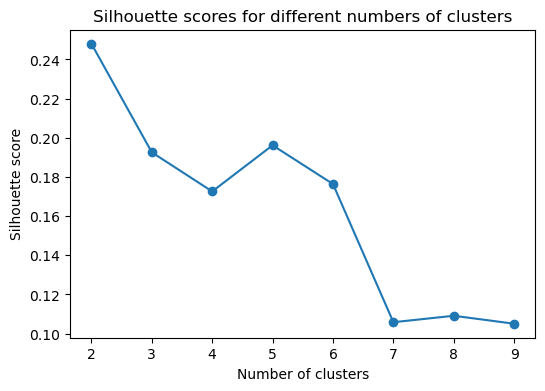

In [119]:
# Perform K—Mean

columns_to_drop = ['class'] 
df_test = df.drop(columns=columns_to_drop)

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

silhouette_scores = []

K_range = range(2, 10)
for K in K_range:
    km = KMeans(n_clusters=K, n_init=20,random_state=1)
    clusters = km.fit_predict(df_test)
    silhouette_scores.append(silhouette_score(df_test, clusters))

plt.figure(figsize=(6,4))
plt.plot(K_range, silhouette_scores, marker='o')
plt.title('Silhouette scores for different numbers of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()

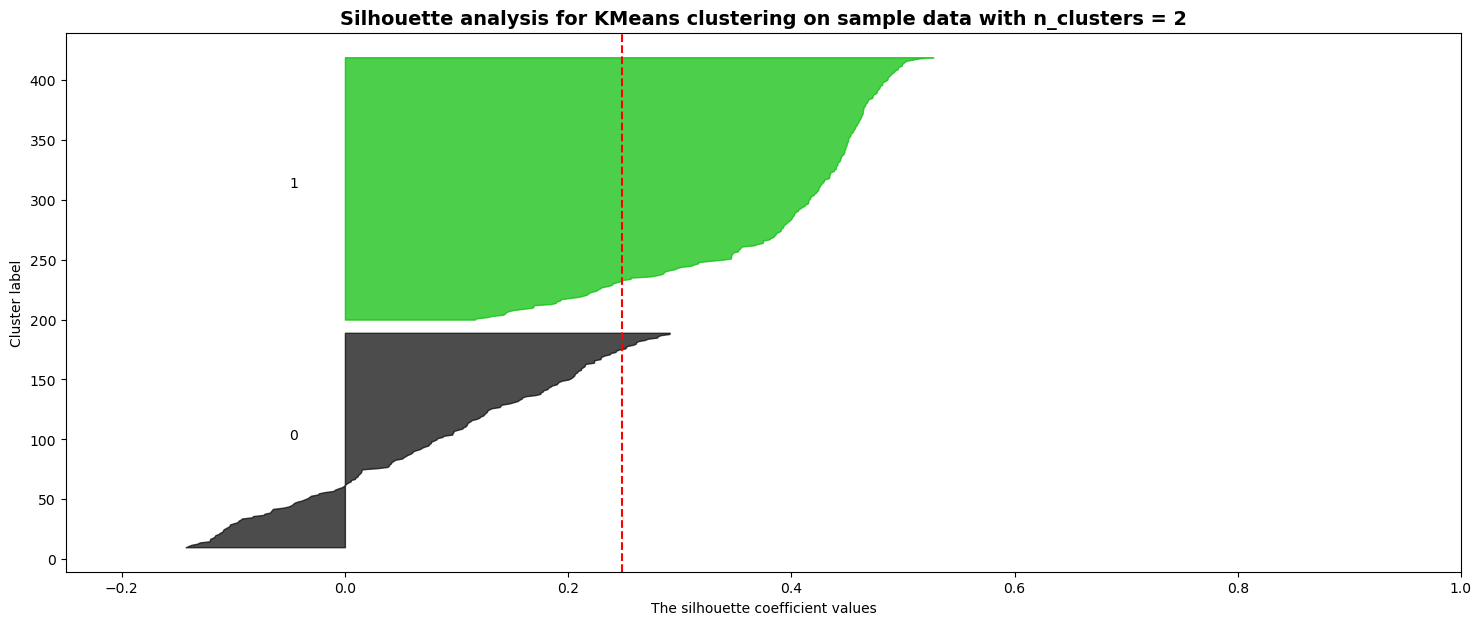

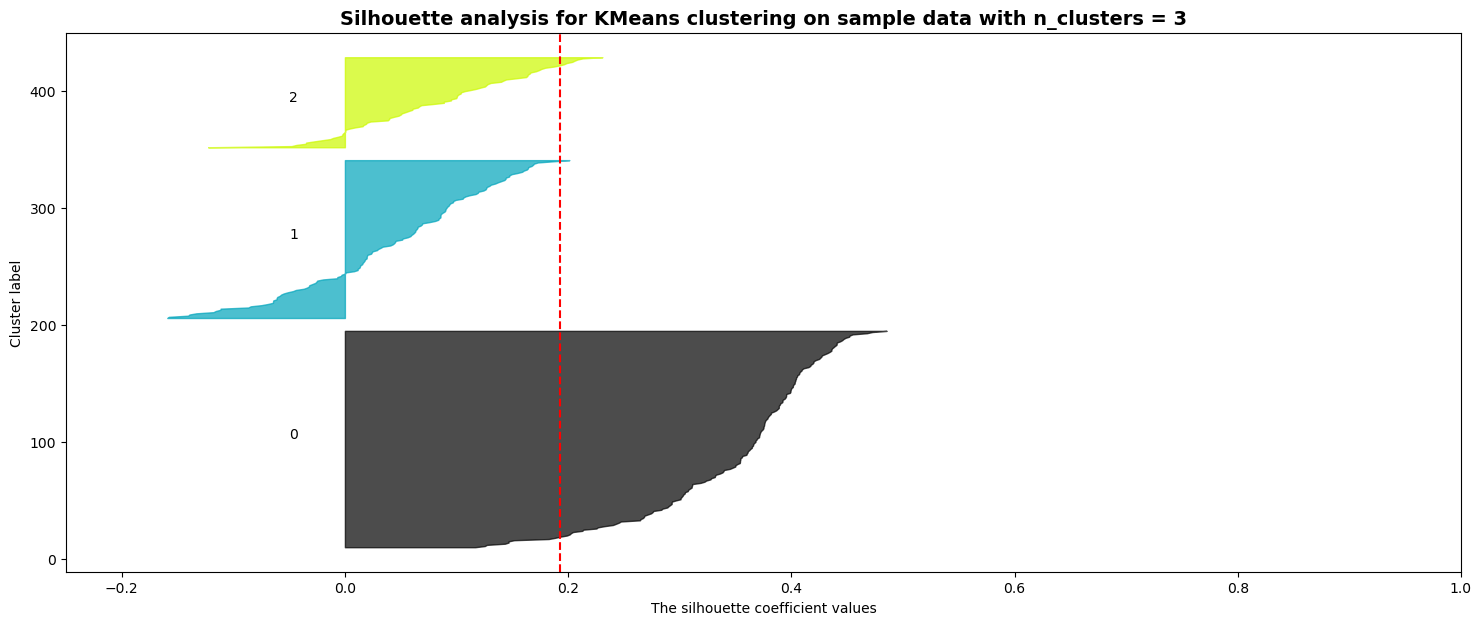

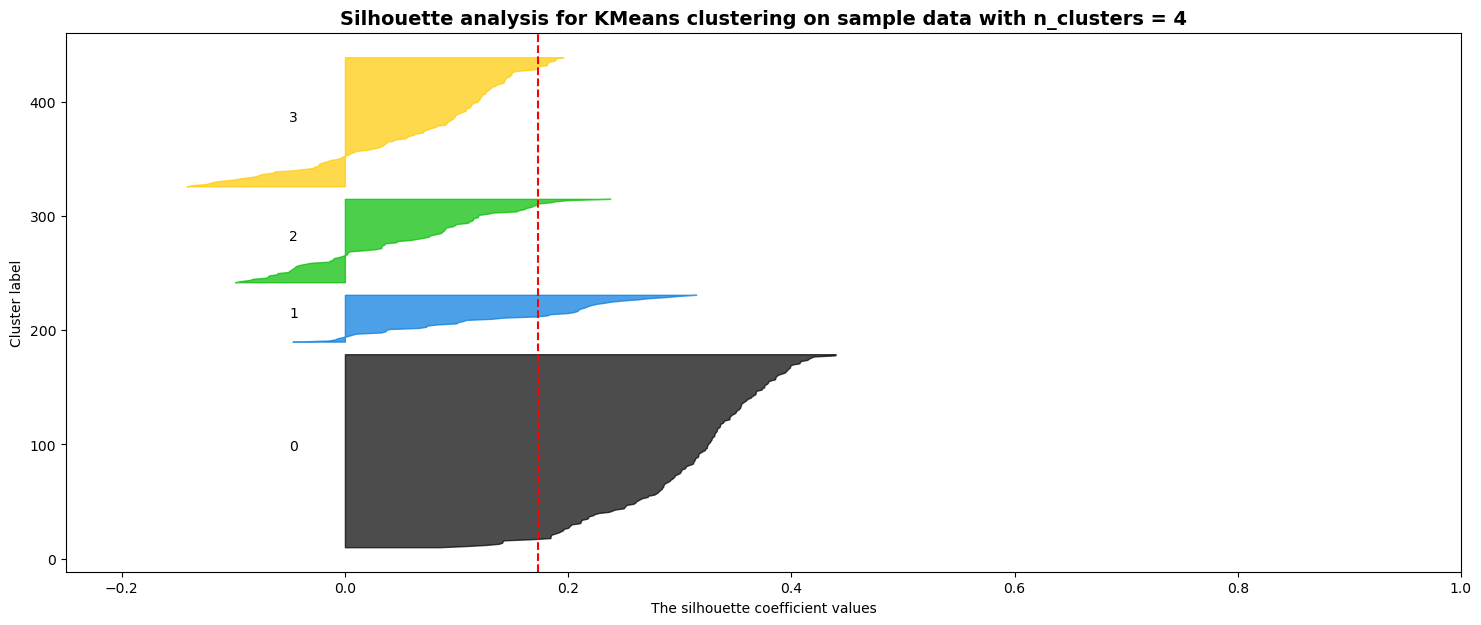

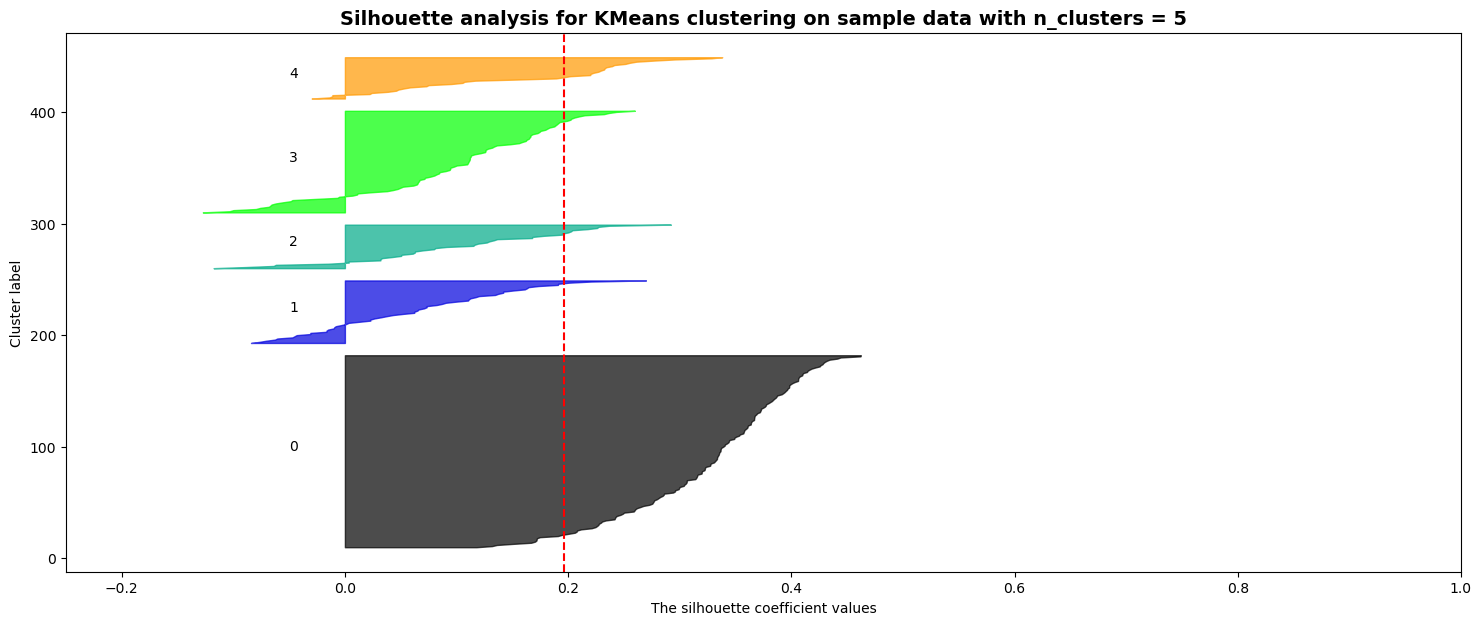

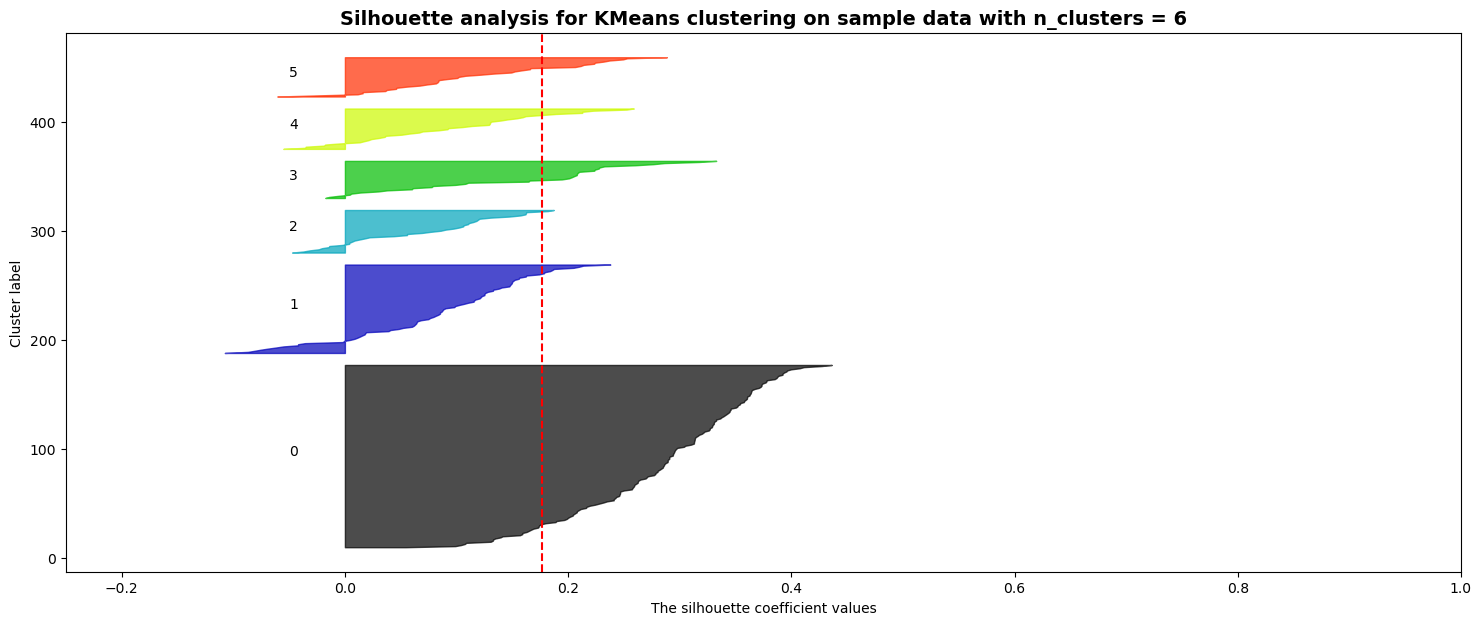

In [120]:
import matplotlib.cm as cm

range_n_clusters = [2, 3, 4, 5, 6]
for n_clusters in range_n_clusters:
    km = KMeans(n_clusters = n_clusters, n_init = 20, random_state=1)
    cluster_labels_km = km.fit_predict(df_test)
    silhouette_avg_km = silhouette_score(df_test, cluster_labels_km)
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_test, cluster_labels_km)
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.25, 1])# change this based on the silhouette range

    y_lower = 10
    
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels_km == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  

    ax1.set_title("The silhouette plot for various cluster")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg_km, color="red", linestyle="--")
    plt.title(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )


Negative silhouette scores are observed. This suggests that some samples are in the wrong clusters. 

These Silhouette scores are very low, which indicate that the data dimensions are very high, and we can use PCA to reduce the dimensions first. Notice that we cannot include the reponse variable and those categorical variables. So, we have to drop them.

In [121]:
# Check the variance after scaling
df[num_col].var()

age     1.002506
bp      1.002506
bgr     1.002506
bu      1.002506
sod     1.002506
pcv     1.002506
wbcc    1.002506
sc      1.002506
pot     1.002506
hemo    1.002506
rbcc    1.002506
dtype: float64

We have to do PCA here.

In [122]:
columns_to_drop = ['class'] 
df_test = df.drop(columns=columns_to_drop)
X = pd.DataFrame(df_test, index=df_test.index, columns=df_test.columns)
X.shape

(400, 24)

All variables variance almost equal to 1, profomance is good.

In [123]:
from sklearn.decomposition import PCA, TruncatedSVD
pca_X = PCA()

In [124]:
pc_scores = pd.DataFrame(pca_X.fit_transform(X), index=X.index)
pc_scores.head(6)

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,-1.100276,0.210773,0.090902,0.428113,0.199005,-0.299214,-0.610971,0.081702,0.544803,-0.137929,...,-0.841556,0.576690,-0.083078,-0.200974,-0.215921,-0.035500,-0.024735,-0.076349,0.060327,-0.000465
1,-0.237962,-0.206051,3.832046,2.340703,-0.335330,0.652917,0.667104,-0.792093,-0.592792,-0.276201,...,-0.596586,-0.416832,-0.180194,-0.220642,0.160045,0.057282,-0.042083,-0.056256,-0.164995,0.004400
2,2.248100,2.414937,-0.580160,0.833137,0.683829,0.111290,0.584537,-0.287958,-0.658356,0.027621,...,0.226453,-0.906846,-0.669475,-0.523465,-0.488525,0.254189,0.275698,-0.175594,-0.085434,-0.003861
3,2.956142,-0.679070,3.496483,-0.314272,1.851940,0.962818,-1.339351,-0.289333,-0.113480,0.396733,...,0.460967,0.358853,-1.036628,0.262281,-0.002954,0.125662,0.056272,0.309366,-0.139486,-0.007173
4,0.091378,-0.364481,0.881537,0.530805,0.005617,-0.615642,-0.541377,-1.011324,0.027386,0.307255,...,-0.293343,-0.432154,-0.023635,-0.044172,0.139016,0.165692,-0.082592,-0.025496,-0.125019,-0.005471
5,0.324429,0.230099,1.691123,-0.480013,0.531973,-1.413425,-2.186151,-1.023987,-1.009768,0.687812,...,-0.821798,0.148643,0.135439,0.298868,0.024238,0.454170,0.040763,0.107955,0.006924,-0.000105


In [125]:
pc_scores.var()

0     5.530005
1     1.578895
2     1.294642
3     1.038559
4     0.932946
5     0.866687
6     0.756855
7     0.673354
8     0.552268
9     0.420915
10    0.353389
11    0.178450
12    0.166399
13    0.151955
14    0.140828
15    0.102674
16    0.100409
17    0.091244
18    0.078300
19    0.073827
20    0.056357
21    0.042155
22    0.039257
23    0.000017
dtype: float64

use first 4 for their eigenvalue > 1

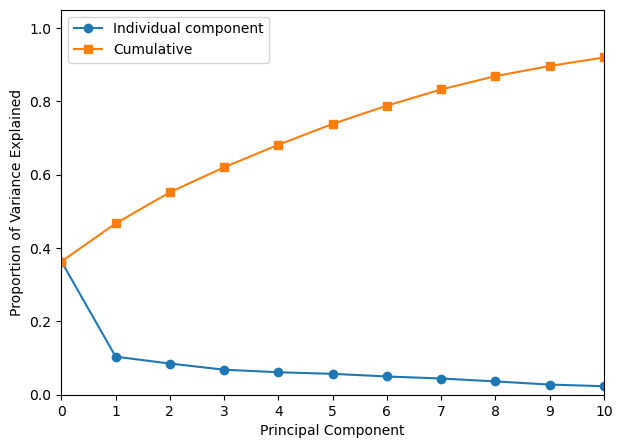

In [126]:
plt.figure(figsize=(7,5))

plt.plot(pca_X.explained_variance_ratio_, '-o', label='Individual component')
plt.plot( np.cumsum(pca_X.explained_variance_ratio_), '-s', label='Cumulative')

plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.xlim(0.75,4.25)
plt.ylim(0,1.05)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10])
plt.legend(loc=2)

In [127]:
pca = PCA().fit(X)
print(pca_X.explained_variance_ratio_)
sum(pca.explained_variance_ratio_[:4])

[3.63328780e-01 1.03735549e-01 8.50597488e-02 6.82347460e-02
 6.12957955e-02 5.69425219e-02 4.97264027e-02 4.42402405e-02
 3.62847253e-02 2.76547131e-02 2.32181096e-02 1.17243819e-02
 1.09326331e-02 9.98366867e-03 9.25262006e-03 6.74582318e-03
 6.59699488e-03 5.99487844e-03 5.14441022e-03 4.85055503e-03
 3.70270610e-03 2.76963351e-03 2.57925484e-03 1.10771991e-06]


0.6203588237293716

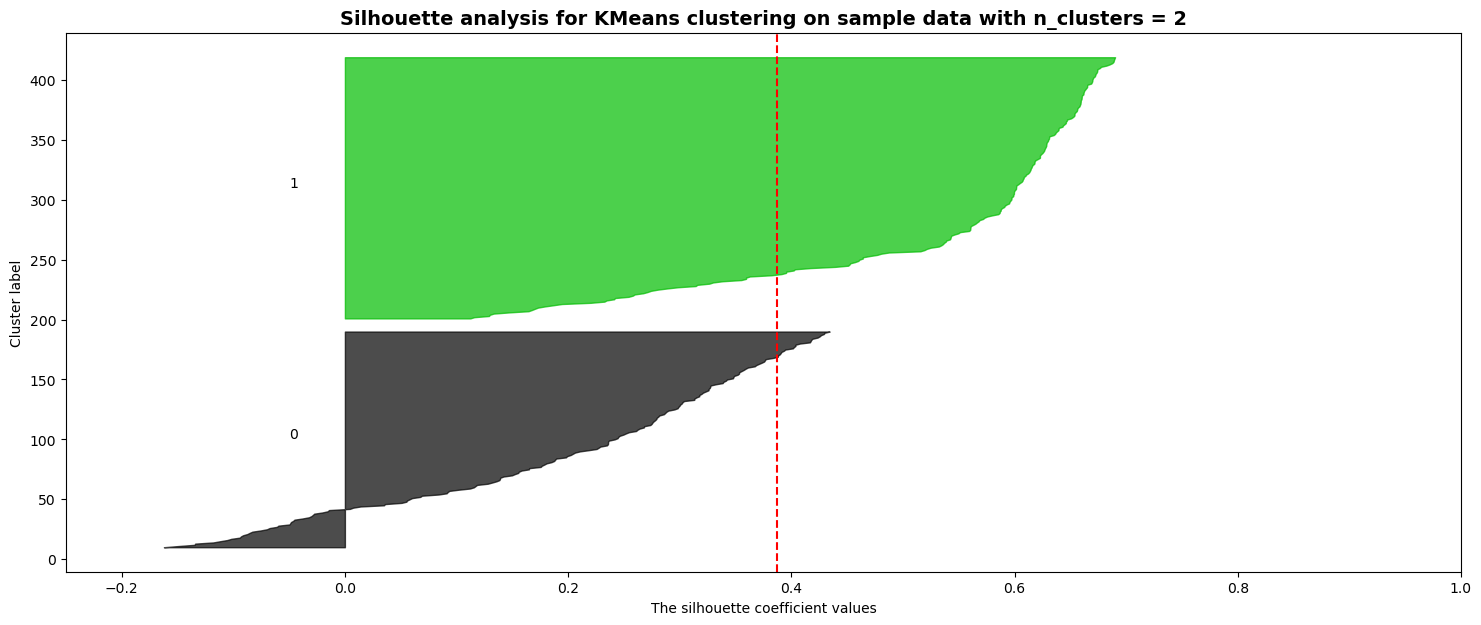

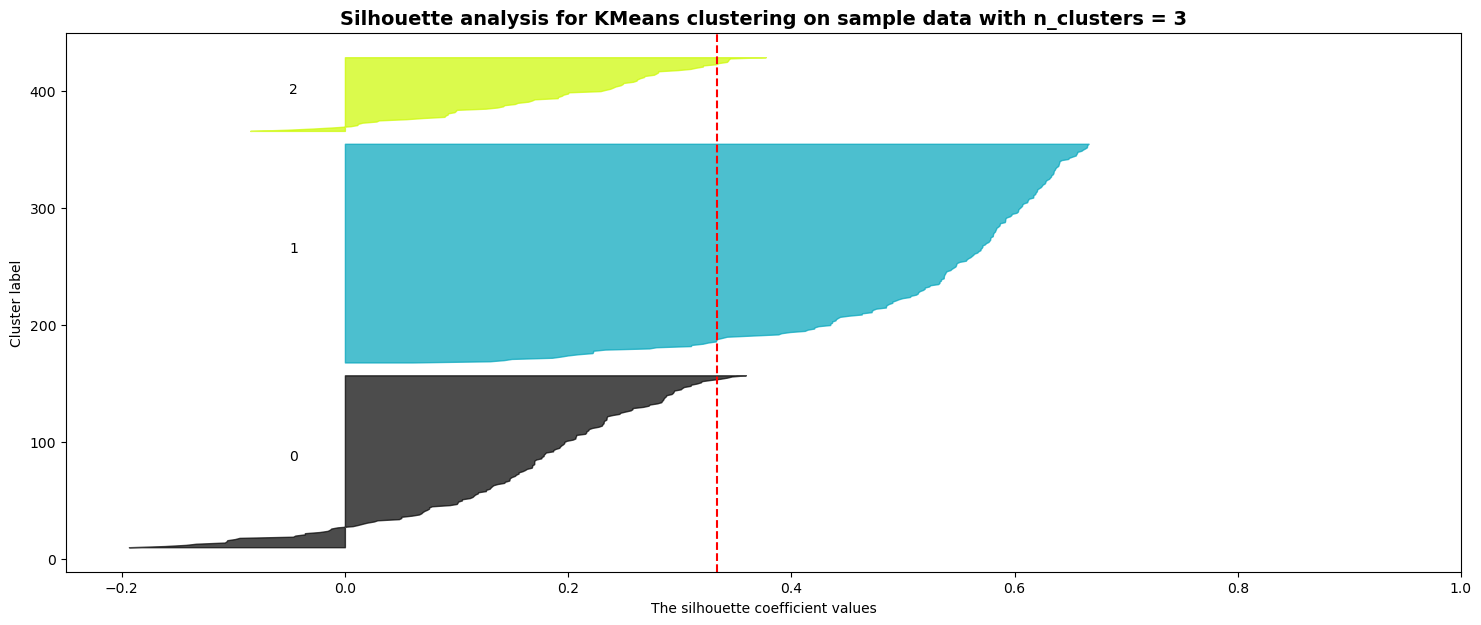

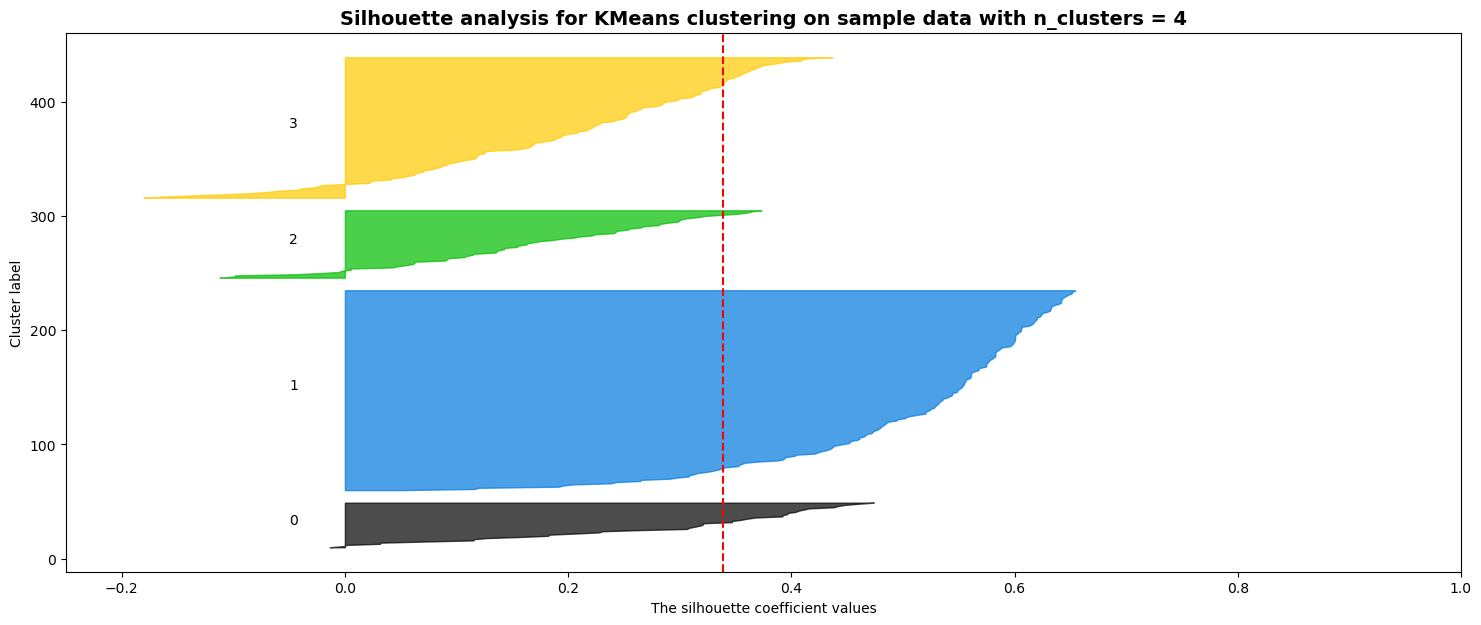

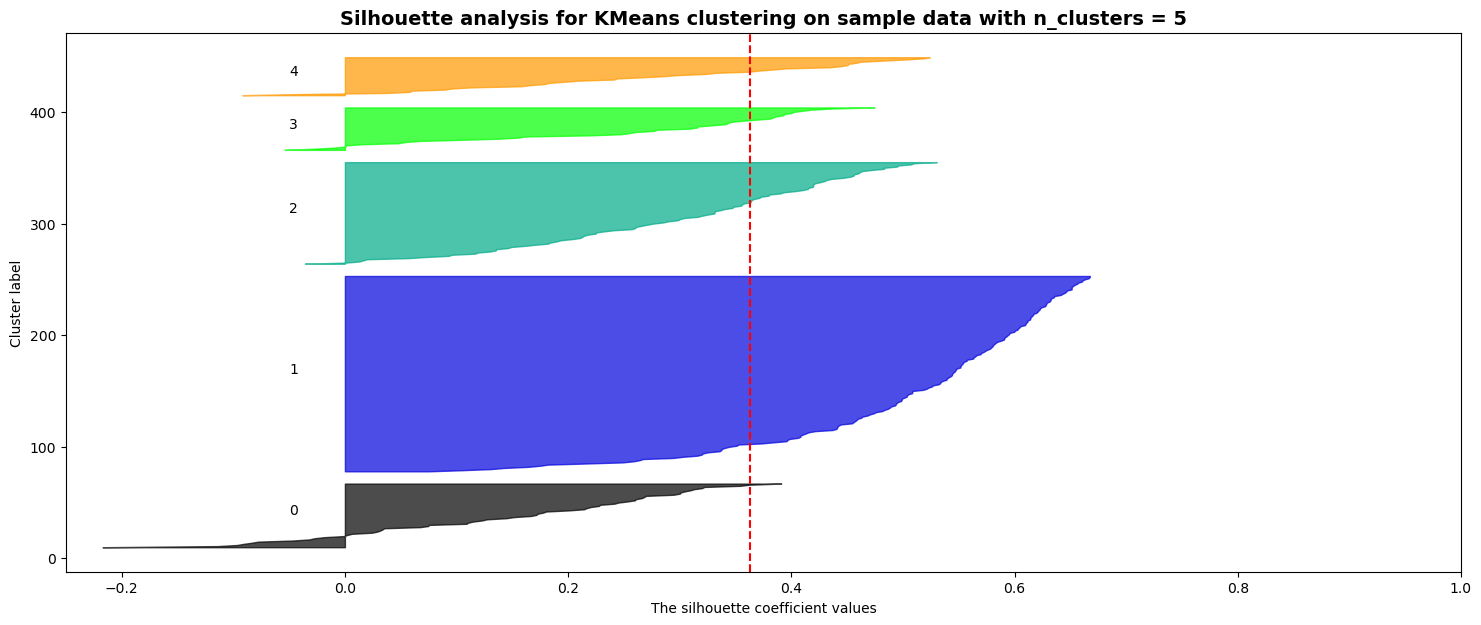

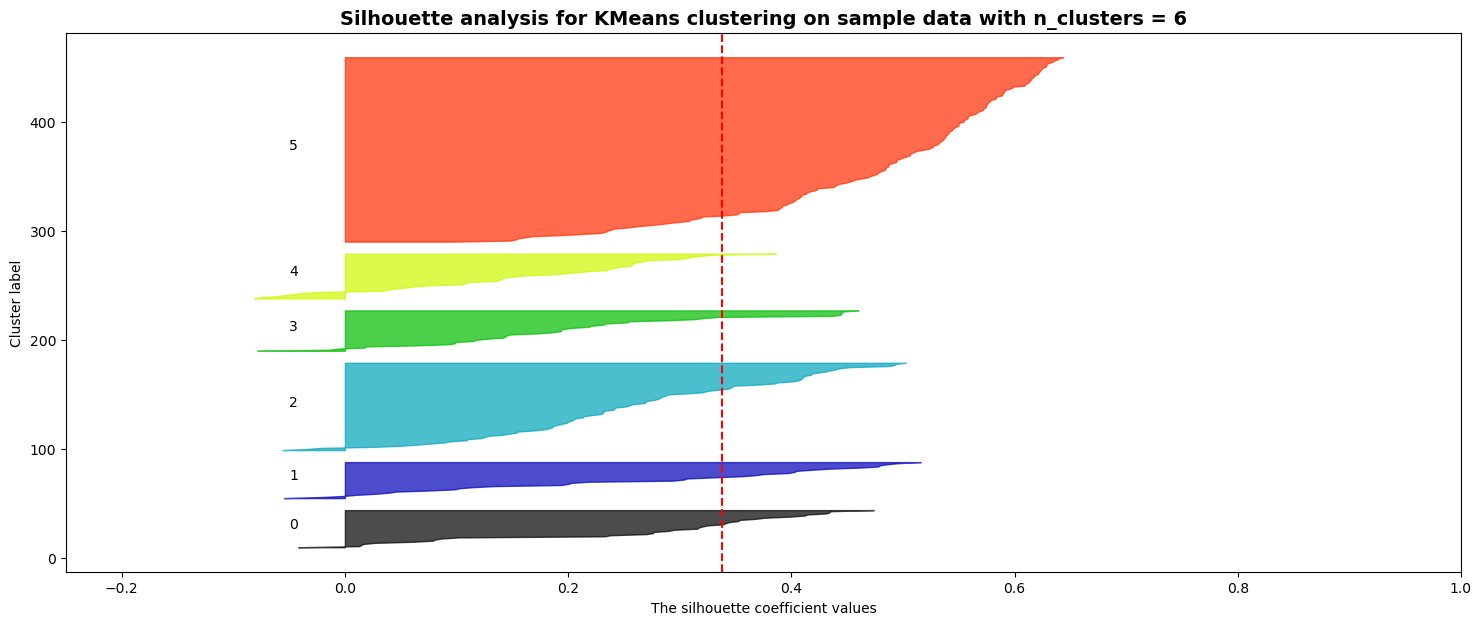

In [153]:
pca = PCA(n_components=4)
df_pca = pca.fit_transform(df_test)

import matplotlib.cm as cm

range_n_clusters = [2, 3, 4, 5, 6]
for n_clusters in range_n_clusters:
    km = KMeans(n_clusters = n_clusters, n_init = 20, random_state=1)
    cluster_labels_km = km.fit_predict(df_pca)
    silhouette_avg_km = silhouette_score(df_pca, cluster_labels_km)
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_pca, cluster_labels_km)
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.25, 1])# change this based on the silhouette range

    y_lower = 10
    
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels_km == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  

    ax1.set_title("The silhouette plot for various cluster")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg_km, color="red", linestyle="--")
    plt.title(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )


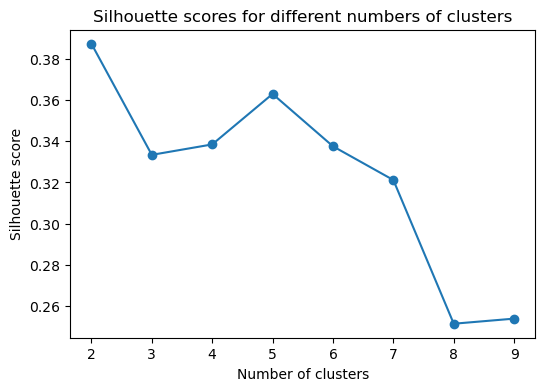

In [154]:
# Perform K—Mean

silhouette_scores = []

K_range = range(2, 10)
for K in K_range:
    km = KMeans(n_clusters=K, n_init=20,random_state=1)
    clusters = km.fit_predict(df_pca)
    silhouette_scores.append(silhouette_score(df_pca, clusters))

plt.figure(figsize=(6,4))
plt.plot(K_range, silhouette_scores, marker='o')
plt.title('Silhouette scores for different numbers of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()

Text(0, 0.5, 'Principal Component 2')

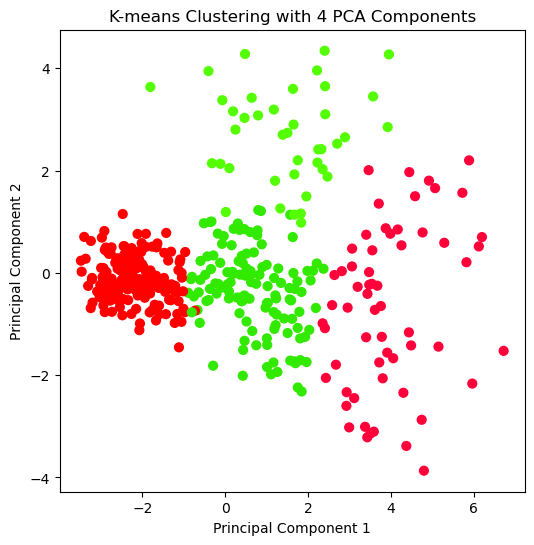

In [128]:
#######################
km4 = KMeans(n_clusters=4, n_init=20, random_state=0)
km4.fit(df)

pca = PCA(n_components=4)
df_pca = pca.fit_transform(df_test)

fig, (ax1) = plt.subplots(1, figsize=(6,6))

ax1.scatter(df_pca[:,0], df_pca[:,1], s=40, c=km4.labels_, cmap=plt.cm.prism) 
ax1.set_title('K-means Clustering with 4 PCA Components')
ax1.set_xlabel('Principal Component 1')
ax1.set_ylabel('Principal Component 2')

### **8. Data Splitting**

In [129]:
from sklearn.model_selection import train_test_split

In [130]:
X_train, X_test, y_train, y_test = train_test_split(
    pc_scores, df['class'], test_size=0.3, random_state=1)

### **9. Classifier Choices**

### **10. Performance Metrics**

In [131]:
from sklearn.linear_model import LogisticRegression

In [132]:
def_log = LogisticRegression(max_iter = 500)

Train the model on the training set and make predictions on the test set. 

In [133]:
def_log.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [134]:
pred_prob = def_log.predict_proba(X_test)
df_pro = pd.DataFrame(data = {'prob': pred_prob[:,1], 'y_test': y_test})
df_pro.head(5)

,prob,y_test
398,0.006797,0.0
125,0.998948,1.0
328,0.040613,0.0
339,0.033737,0.0
172,0.999941,1.0


In [135]:
# Create a data frame with predicted probabilities (for default) and the class labels in the test set.
df_logit = pd.DataFrame(
    data = {'prob0': pred_prob[:,1], 'y_test': y_test}
    )

In [136]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

In [137]:
fpr, tpr, thresholds = roc_curve(df_logit.y_test, df_logit.prob0)

In [138]:
# AUC
roc_auc_score(df_logit.y_test, df_logit.prob0)

0.9954285714285713

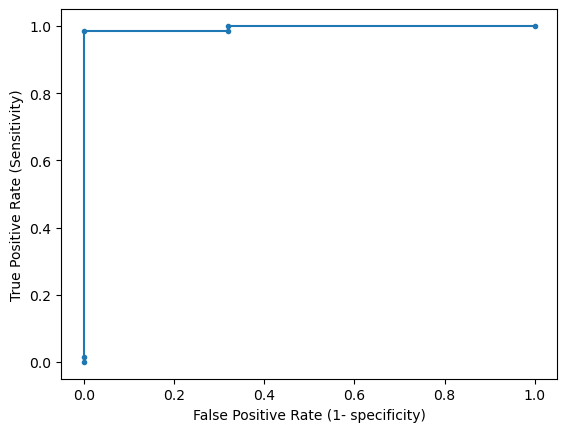

In [139]:
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.xlabel('False Positive Rate (1- specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

### ROC Analysis of Binary Classifier (Youden’s J statistic)

In [140]:
j_statistic = tpr - fpr
optimal_index = np.argmax(j_statistic)
optimal_threshold = thresholds[optimal_index]
optimal_threshold

0.28787250950689486

In [141]:
ind = np.where(np.isclose(thresholds, optimal_threshold, atol=0.001))
print(tpr[ind])
print(1-fpr[ind])

[0.98571429]
[1.]


### ROC Analysis of Binary Classifier (Kolmogorov–Smirnov statistic)

In [142]:
ks_statistic = np.max(tpr - fpr)
ks_threshold = thresholds[np.argmax(tpr - fpr)]
ks_threshold

0.28787250950689486

In [143]:
ind = np.where(np.isclose(thresholds, ks_threshold, atol=0.001))
print(tpr[ind])
print(1-fpr[ind])

[0.98571429]
[1.]


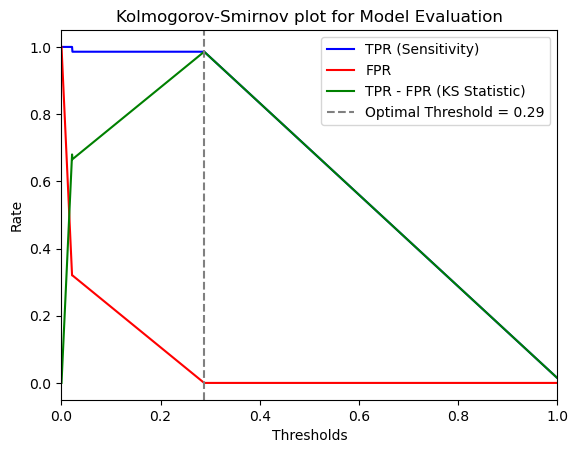

In [144]:
plt.plot(thresholds, tpr, label='TPR (Sensitivity)', color='blue')
plt.plot(thresholds, fpr, label='FPR', color='red')
plt.plot(thresholds, tpr - fpr, label='TPR - FPR (KS Statistic)', color='green')
plt.axvline(x=ks_threshold, color='grey', linestyle='--', label=f'Optimal Threshold = {ks_threshold:.2f}')
plt.title('Kolmogorov-Smirnov plot for Model Evaluation')
plt.xlabel('Thresholds')
plt.ylabel('Rate')
plt.legend()
plt.xlim([0.0, 1.0])
#plt.gca().invert_xaxis() 
plt.show()

The area under the ROC curve (AUC) is around XXXXX.\
From the result of Youden’s J statistics and Kolmogorov-Smirnov statistics, the optimal probability cut-off point is at around 0.XXX. 

In [145]:
from patsy import dmatrices, dmatrix
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, classification_report
import statsmodels.api as sm
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

choose optimal threshold = 0.45

In [146]:
pred_prob = def_log.predict_proba(X_test)
df = pd.DataFrame(data = {'prob': pred_prob[:,1], 'y_test': y_test})
df['y_test_pred'] = df.prob.map(lambda x: 1 if x>0.288 else 0)
df.head(5)

,prob,y_test,y_test_pred
398,0.006797,0.0,0
125,0.998948,1.0,1
328,0.040613,0.0,0
339,0.033737,0.0,0
172,0.999941,1.0,1


In [147]:
cm = confusion_matrix(df.y_test, df.y_test_pred)
print('Confusion Matrix : \n', cm)

total = sum(sum(cm))
accuracy = (cm[0,0]+cm[1,1])/total
print ('Accuracy : ', accuracy)

Confusion Matrix : 
 [[50  0]
 [ 2 68]]
Accuracy :  0.9833333333333333


In [148]:
sensitivity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Sensitivity : ', sensitivity)

specificity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Specificity : ', specificity )



Sensitivity :  0.9714285714285714
Specificity :  1.0


the significant variables in predicting

In [149]:
model = sm.Logit(y_train, X_train).fit()

Optimization terminated successfully.
         Current function value: 0.117267
         Iterations 11


In [150]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  class   No. Observations:                  280
Model:                          Logit   Df Residuals:                      256
Method:                           MLE   Df Model:                           23
Date:                Thu, 11 Apr 2024   Pseudo R-squ.:                  0.8201
Time:                        21:45:26   Log-Likelihood:                -32.835
converged:                       True   LL-Null:                       -182.49
Covariance Type:            nonrobust   LLR p-value:                 6.297e-50
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
0              4.3961      0.930      4.726      0.000       2.573       6.219
1              0.1308      0.270      0.485      0.628      -0.398       0.660
2              0.8221      0.304      2.706      0.007       0.227       1.417
3             -0.1999      0.421     -0.475      0.635      -1.025       0.625
4              2.1275      0.694      3.067      0.002       0.768       3.487
5             -1.3481      0.578     -2.334      0.020      -2.480      -0.216
6              1.2301      0.474      2.593      0.010       0.300       2.160
7             -2.1082      0.580     -3.637      0.000      -3.244      -0.972
8              0.3430      0.687      0.499      0.618      -1.004       1.690
9             -0.1738      0.591     -0.294      0.769      -1.332       0.985
10             1.5753      0.832      1.894      0.058      -0.055       3.205
11             5.6285      1.448      3.887      0.000       2.790       8.467
12             3.0663      1.001      3.063      0.002       1.104       5.028
13             5.5740      2.064      2.700      0.007       1.528       9.620
14             2.3599      1.122      2.104      0.035       0.161       4.558
15             0.0428      0.964      0.044      0.965      -1.846       1.931
16             1.4145      1.204      1.174      0.240      -0.946       3.775
17            -2.7954      1.340     -2.086      0.037      -5.422      -0.168
18            -1.0448      1.320     -0.791      0.429      -3.632       1.543
19             3.0448      1.266      2.405      0.016       0.564       5.526
20            -6.2051      1.960     -3.167      0.002     -10.046      -2.364
21             3.5151      1.869      1.881      0.060      -0.148       7.179
22            -0.3489      1.649     -0.212      0.832      -3.581       2.883
23          -460.7203    120.075     -3.837      0.000    -696.064    -225.377
==============================================================================

Possibly complete quasi-separation: A fraction 0.51 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

### **11. Feature Selection/Extraction**

### **12. Classifier Comparison**

In [151]:
from sklearn.ensemble import RandomForestClassifier

In [152]:
rf=RandomForestClassifier().fit(X_train, y_train)
rf.fit(X_train,y_train)
y_test_pred = rf.predict(X_test)
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99        50
         1.0       1.00      0.99      0.99        70

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



By interpreting with random forest, the accuracy of the model is 0.99, which is extremely high. With the confusion matrix, the optimal thredhold is 0.45, we get 0.975 accuracy.

### **13. Interpretable Classifier Insight**

### **14. [Bonus] Sub-group Improvement Strategy**

### **15. Team Contributions**

### **16. Link to the public GitHub repository**

https://github.com/Barkesty/Project-Chronic-Kidney-Disease-Classification-Challenge.git